# Thinkful Drill #4: Exploring the Central Limit Theorem
Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook from the previous assignment, reproduce the pop1 and pop2 populations and samples, using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

1) Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

2) Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

3) Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pop1 = np.random.binomial(10,0.2,10000)
pop2 = np.random.binomial(10,0.5,10000)

sample1 = np.random.choice(pop1,100,replace=True)
sample2 = np.random.choice(pop2,100,replace=True)

print("Sample 1 mean is: {}".format(sample1.mean()))
print("Sample 2 mean is: {}".format(sample2.mean()))
print("Sample 1 standard deviation is: {}".format(sample1.std()))
print("Sample 2 standard deviation is: {}".format(sample2.std()))

Sample 1 mean is: 1.97
Sample 2 mean is: 5.05
Sample 1 standard deviation is: 1.3073255141700557
Sample 2 standard deviation is: 1.6209565077447328


#### Increase sample size from 100 to 1000

Sample 1 mean is: 2.032
Sample 2 mean is: 5.047
Sample 1 standard deviation is: 1.2763134411264343
Sample 2 standard deviation is: 1.5436291653114098


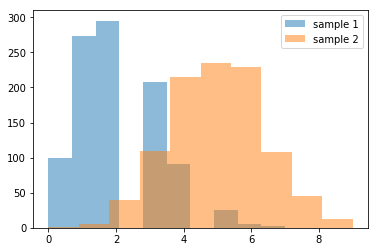

In [8]:
sample1 = np.random.choice(pop1,1000,replace=True)
sample2 = np.random.choice(pop2,1000,replace=True)

print("Sample 1 mean is: {}".format(sample1.mean()))
print("Sample 2 mean is: {}".format(sample2.mean()))
print("Sample 1 standard deviation is: {}".format(sample1.std()))
print("Sample 2 standard deviation is: {}".format(sample2.std()))

plt.hist(sample1,alpha=0.5,label="sample 1")
plt.hist(sample2,alpha=0.5,label="sample 2")
plt.legend(loc="upper right")
plt.show()

#### Decrease sample size from 1000 to 20

Sample 1 mean is: 2.35
Sample 2 mean is: 4.8
Sample 1 standard deviation is: 1.4585952145814822
Sample 2 standard deviation is: 1.208304597359457


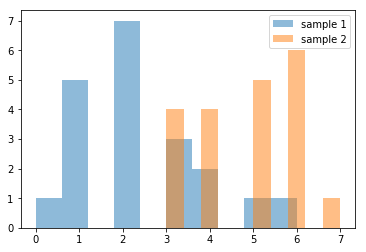

In [9]:
sample1 = np.random.choice(pop1,20,replace=True)
sample2 = np.random.choice(pop2,20,replace=True)

print("Sample 1 mean is: {}".format(sample1.mean()))
print("Sample 2 mean is: {}".format(sample2.mean()))
print("Sample 1 standard deviation is: {}".format(sample1.std()))
print("Sample 2 standard deviation is: {}".format(sample2.std()))

plt.hist(sample1,alpha=0.5,label="sample 1")
plt.hist(sample2,alpha=0.5,label="sample 2")
plt.legend(loc="upper right")
plt.show()

Both mean and standard deviation changed when sample sizes were changed. The histograms also change in shape.

#### Change probabiliy value for pop1 to 0.3

In [10]:
pop1 = np.random.binomial(10,0.3,10000)

sample1 = np.random.choice(pop1,100,replace=True)
sample2 = np.random.choice(pop2,100,replace=True)

diff = sample2.mean() - sample1.mean()
size = np.array([len(sample1),len(sample2)])
sd = np.array([sample1.std(),sample2.std()])

# Calculate the standard error of the sampling distribution of the difference of the means
diff_se = (sum(sd**2/size))**0.5

print("The t-value is: {}".format(diff/diff_se))

The t-value is: 10.765893556950362


In [11]:
# use scipy to calculate t-value (statistic) and pvalue
from scipy.stats import ttest_ind
print(ttest_ind(sample2,sample1,equal_var=False))

Ttest_indResult(statistic=10.711928838392712, pvalue=2.1325511504555283e-21)


In [13]:
pop1 = np.random.binomial(10,0.4,10000)

sample1 = np.random.choice(pop1,100,replace=True)
sample2 = np.random.choice(pop2,100,replace=True)

print(ttest_ind(sample2,sample1,equal_var=False))

Ttest_indResult(statistic=3.9264967320426827, pvalue=0.00011968661053200443)


Both t-value and p-value changed. 

#### Change to different probability distribution

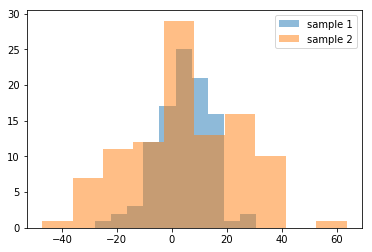

Ttest_indResult(statistic=0.21638202228943704, pvalue=0.82899276042688474)


In [14]:
pop1 = np.random.normal(5,10,10000)
pop2 = np.random.normal(5,20,10000)

pop1.sort()
pop2.sort()

sample1 = np.random.choice(pop1,100,replace=True)
sample2 = np.random.choice(pop2,100,replace=True)

plt.hist(sample1,alpha=0.5,label="sample 1")
plt.hist(sample2,alpha=0.5,label="sample 2")
plt.legend(loc="upper right")
plt.show()

print(ttest_ind(sample2,sample1,equal_var=False))

The t-value and p-value indicate that the sample mean values accurately represent the population values (p-value > 0.5 and t-value < 2 suggests that the means are less than 1 standard deviation apart from each other)